In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,LabelEncoder

In [2]:
iris = pd.read_csv('datasets/iris.csv')

In [3]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

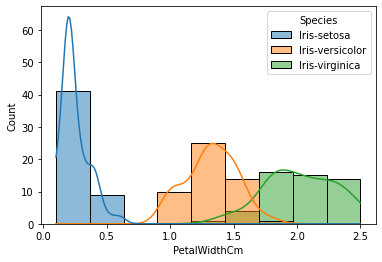

In [10]:
sns.histplot(data=iris,x='PetalWidthCm',hue='Species', kde=True,cbar=False)

In [11]:
df = iris.copy()

In [12]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
le = LabelEncoder()
le.fit(df['Species'])

LabelEncoder()

In [14]:
encoder_df = le.transform(df['Species'])

In [15]:
encoder_df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
df['Species'] = encoder_df

In [17]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [19]:
X = df.iloc[:,1:5]
y = df.iloc[:,-1]

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [21]:
X_trian, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.1, shuffle=True, random_state=2022, stratify=y)

In [22]:
st = StandardScaler()
st.fit(X_trian)
X_std_train = st.transform(X_trian)

In [25]:
X_std_train.shape

(135, 4)

In [26]:
y_train.shape

(135,)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std_train,y_train)

KNeighborsClassifier()

In [28]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

hist = []

for k in tqdm(range(3,51)):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_std_train, y_train, cv=5, scoring="accuracy")
    
    hist.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 74.77it/s]


In [29]:
dicts = {}
for a,k in enumerate(hist):
    dicts[a] = k

In [30]:
dicts

{0: 0.9333333333333333,
 1: 0.9185185185185185,
 2: 0.9259259259259259,
 3: 0.9333333333333333,
 4: 0.9333333333333332,
 5: 0.9629629629629628,
 6: 0.9555555555555554,
 7: 0.9555555555555554,
 8: 0.9629629629629628,
 9: 0.9555555555555554,
 10: 0.9481481481481481,
 11: 0.9407407407407409,
 12: 0.9407407407407409,
 13: 0.9407407407407409,
 14: 0.9333333333333332,
 15: 0.9407407407407407,
 16: 0.9407407407407407,
 17: 0.9407407407407407,
 18: 0.9333333333333332,
 19: 0.9333333333333332,
 20: 0.9407407407407407,
 21: 0.9333333333333332,
 22: 0.9259259259259259,
 23: 0.9185185185185185,
 24: 0.9185185185185185,
 25: 0.8962962962962964,
 26: 0.9037037037037037,
 27: 0.9037037037037037,
 28: 0.9111111111111111,
 29: 0.9037037037037037,
 30: 0.9111111111111111,
 31: 0.888888888888889,
 32: 0.9037037037037037,
 33: 0.8962962962962961,
 34: 0.888888888888889,
 35: 0.8962962962962961,
 36: 0.8814814814814815,
 37: 0.8814814814814815,
 38: 0.8814814814814815,
 39: 0.8814814814814815,
 40: 0.88148

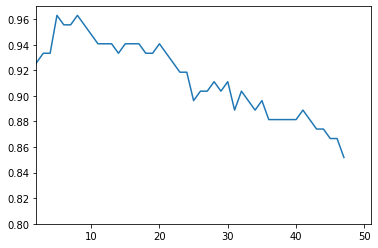

In [35]:
plt.figure(figsize=(6,4))
plt.plot(dicts.keys(),dicts.values())
plt.ylim(0.80,0.97)
plt.xlim(2, 51)

plt.show()

In [42]:
X_std_test = st.transform(X_test)
y_std_test = np.array(y_test).reshape([-1])
y_std_train = np.array(y_train).reshape([-1])

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std_train,y_std_train)
y_pred = knn.predict(X_std_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(y_std_test,y_pred)

In [51]:
cm

array([[5, 0, 0],
       [0, 5, 0],
       [0, 0, 5]], dtype=int64)

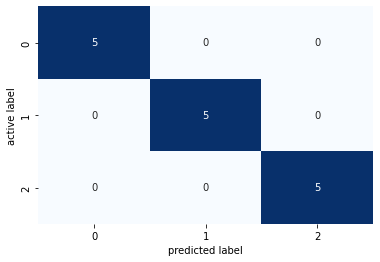

In [52]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='g',cbar=False,cmap="Blues")
plt.ylabel("active label")
plt.xlabel("predicted label")
plt.show()